# Output variable -> y
# y -> Whether the client has subscribed a term deposit or not 
# Binomial ("yes" or "no")

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
#Load the dataset and Explore it
bank = pd.read_csv('C:/Users/chowd/OneDrive/Desktop/Data Science/Assignments/bank_data.csv')
bank

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,977,3,-1,0,0,...,0,0,0,0,0,0,1,0,0,1
45207,71,0,1729,0,0,456,2,-1,0,0,...,0,0,1,0,0,0,0,0,0,1
45208,72,0,5715,0,0,1127,5,184,3,0,...,0,0,1,0,0,0,0,0,0,1
45209,57,0,668,0,0,508,4,-1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Exploratory Data Analysis
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45211 non-null  int64
 1   default          45211 non-null  int64
 2   balance          45211 non-null  int64
 3   housing          45211 non-null  int64
 4   loan             45211 non-null  int64
 5   duration         45211 non-null  int64
 6   campaign         45211 non-null  int64
 7   pdays            45211 non-null  int64
 8   previous         45211 non-null  int64
 9   poutfailure      45211 non-null  int64
 10  poutother        45211 non-null  int64
 11  poutsuccess      45211 non-null  int64
 12  poutunknown      45211 non-null  int64
 13  con_cellular     45211 non-null  int64
 14  con_telephone    45211 non-null  int64
 15  con_unknown      45211 non-null  int64
 16  divorced         45211 non-null  int64
 17  married          45211 non-null  int64
 18  single

In [6]:
# To see all columns
pd.set_option("display.max.columns", None)
data1

age  default  balance  pdays  previous  poutfailure  poutother  \
0       58        0     2143     -1         0            0          0   
1       44        0       29     -1         0            0          0   
2       33        0        2     -1         0            0          0   
3       47        0     1506     -1         0            0          0   
4       33        0        1     -1         0            0          0   
...    ...      ...      ...    ...       ...          ...        ...   
45206   51        0      825     -1         0            0          0   
45207   71        0     1729     -1         0            0          0   
45208   72        0     5715    184         3            0          0   
45209   57        0      668     -1         0            0          0   
45210   37        0     2971    188        11            0          1   

       poutsuccess  poutunknown  con_cellular  con_telephone  con_unknown  \
0                0            1             0              0            1   
1                0            1             0              0            1   
2                0            1             0              0            1   
3                0            1             0              0            1   
4                0            1             0              0            1   
...            ...          ...           ...            ...          ...   
45206            0            1             1              0            0   
45207            0            1             1              0            0   
45208            1            0             1              0            0   
45209            0            1             0              1            0   
45210            0            0             1              0            0   

       divorced  married  single  joadmin.  joblue.collar  joentrepreneur  \
0             0        1       0         0              0               0   
1             0        0       1         0              0               0   
2             0        1       0         0              0               1   
3             0        1       0         0              1               0   
4             0        0       1         0              0               0   
...         ...      ...     ...       ...            ...             ...   
45206         0        1       0         0              0               0   
45207         1        0       0         0              0               0   
45208         0        1       0         0              0               0   
45209         0        1       0         0              1               0   
45210         0        1       0         0              0               1   

       johousemaid  jomanagement  joretired  joself.employed  joservices  \
0                0             1          0                0           0   
1                0             0          0                0           0   
2                0             0          0                0           0   
3                0             0          0                0           0   
4                0             0          0                0           0   
...            ...           ...        ...              ...         ...   
45206            0             0          0                0           0   
45207            0             0          1                0           0   
45208            0             0          1                0           0   
45209            0             0          0                0           0   
45210            0             0          0                0           0   

       jostudent  jotechnician  jounemployed  y  housing_0  housing_1  loan_0  \
0              0             0             0  0      False       True    True   
1              0             1             0  0      False       True    True   
2              0             0             0  0      False       True   False   
3              0             0             

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Columns: 1654 entries, age to jounknown_1
dtypes: bool(1627), int64(27)
memory usage: 79.5 MB


#  Model Building

In [9]:
# Dividing our data input and ouput variables
x=pd.concat([data1.iloc[:,0:11],data1.iloc[:,12:]],axis=1)
y=data1.iloc[:,11]

In [10]:
# Logistic Regression Model
classifier=LogisticRegression()
classifier.fit(x,y)

C:\Users\chowd\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#  Model Predictions

In [11]:
# Predict for x dataset
y_pred=classifier.predict(x)
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [12]:
y_pred_df = pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
45206,0,0
45207,0,0
45208,0,0
45209,0,0


# Model Accuracy

In [13]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[32191,     0],
       [    1, 13019]], dtype=int64)

In [14]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(39107+1282)/(39107+815+4007+1282)

0.8933445400455642

In [15]:
# As accuaracy = 0.8933, which is greater than 0.5; Thus [:,1] Threshold value > 0.5 = 1 else [:,0] Threshold value < 0.5 = 0
classifier.predict_proba(x)[:,1]

array([9.98661739e-01, 9.99892006e-01, 9.97728480e-01, ...,
       8.50871156e-10, 3.91964972e-03, 4.83232396e-09])

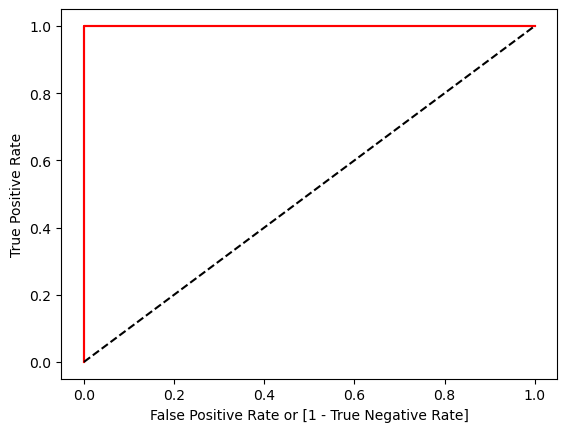

auc accuracy: 0.9999615975422427


In [16]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)